<h1>Data Exploration: Dataset = online shoppers intentions </h1>
<p>Credits: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset</p>

<h2>1. Let's load our data as a DataFrame</h2>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("online_shoppers_intention.csv")

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.shape

(12330, 18)

In [9]:
# Data description
#1. "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
# ==> The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
#The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
#The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
#2. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day 
#===> (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 
#===> The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
#===> For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
#3. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, 
# a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [17]:
categorical_columns = ["OperatingSystems","Browser","Region","TrafficType","Month","VisitorType","Weekend","Revenue"]
df[categorical_columns] = df[categorical_columns].astype('category')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

<h2>2. Let's start exploring</h2>

In [21]:
df.groupby('Revenue').size()

Revenue
False    10422
True      1908
dtype: int64

In [22]:
df["Region"].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

<AxesSubplot: >

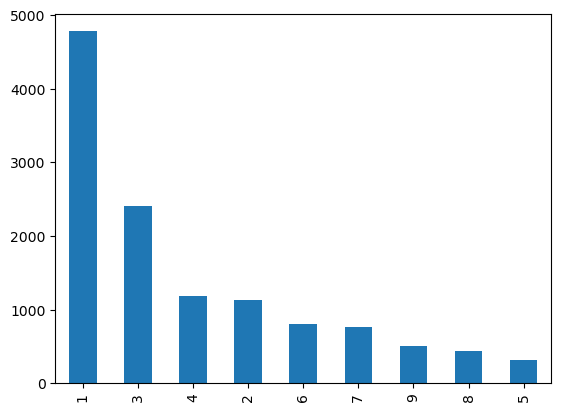

In [24]:
df["Region"].value_counts().plot(kind="bar")

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


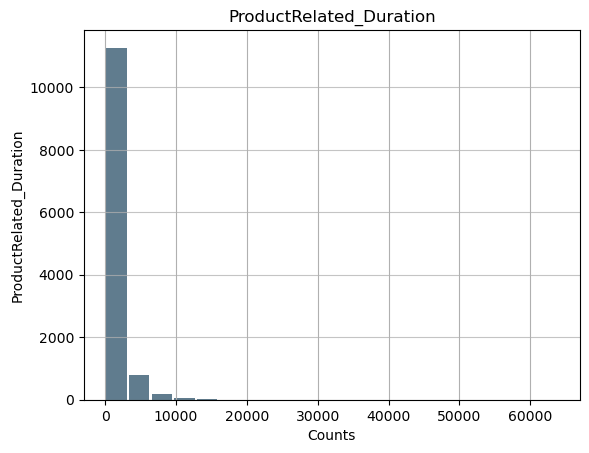

In [30]:
df.ProductRelated_Duration.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('ProductRelated_Duration')
plt.xlabel('Counts')
plt.ylabel('ProductRelated_Duration')
plt.grid(axis='y', alpha=0.75)

/Users/nicolasgakrelidz/opt/anaconda3/envs/simple-ml-notebooks-env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/jw/r6td9y517bz662f21x0prkvr0000gn/T/ipykernel_3340/1394927313.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=np.log(df['ProductRelated_Duration']), shade=True, linewidth=2)


<AxesSubplot: xlabel='ProductRelated_Duration', ylabel='Density'>

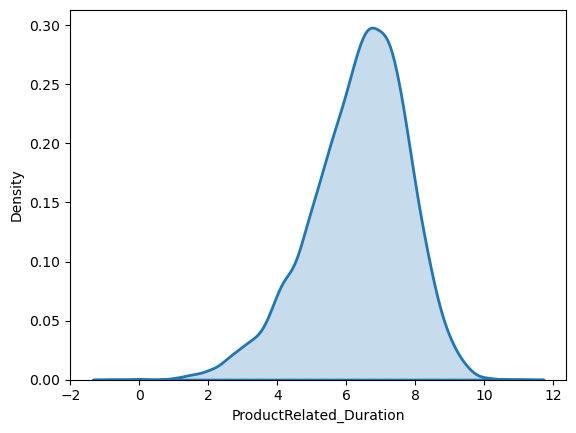

In [43]:
sns.kdeplot(x=np.log(df['ProductRelated_Duration']), shade=True, linewidth=2)

<AxesSubplot: >

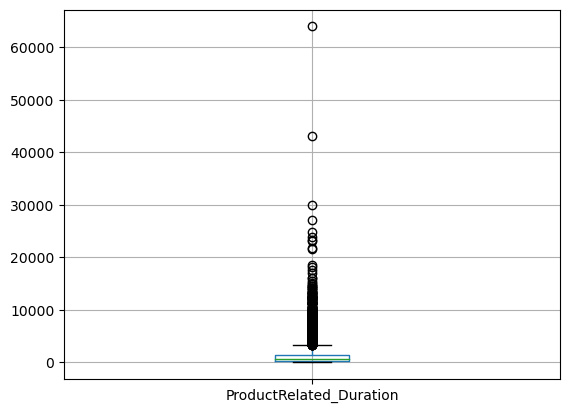

In [31]:
df.boxplot(column=['ProductRelated_Duration'])

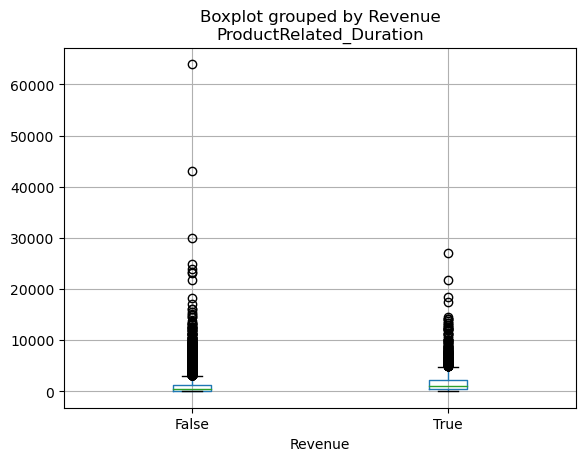

In [32]:
boxplot = df.boxplot(column=['ProductRelated_Duration'],by='Revenue')

<p>We are at least aware that there are some outliers in the numerical columns... How to deal with that is another interesting topic for later</p>

<h2>3. Let"s start crossing our data</h2>

<AxesSubplot: xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

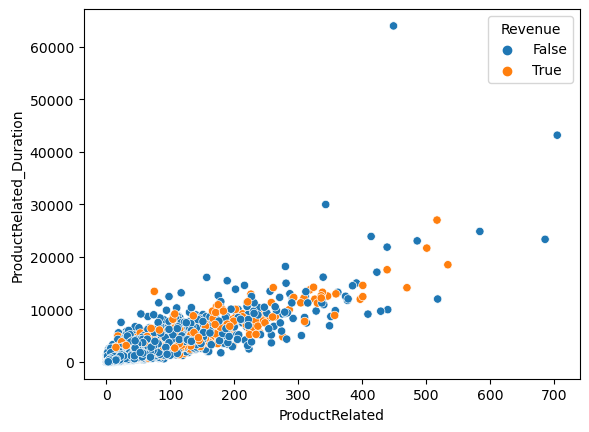

In [36]:

sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration", hue="Revenue", data=df)

In [39]:
corr = df.corr()
round(corr,2)

/var/folders/jw/r6td9y517bz662f21x0prkvr0000gn/T/ipykernel_3340/75656458.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.00,0.60,0.38,0.26,0.43,0.37,-0.22,-0.32,0.10,-0.09
Administrative_Duration,0.60,1.00,0.30,0.24,0.29,0.36,-0.14,-0.21,0.07,-0.07
Informational,0.38,0.30,1.00,0.62,0.37,0.39,-0.12,-0.16,0.05,-0.05
Informational_Duration,0.26,0.24,0.62,1.00,0.28,0.35,-0.07,-0.11,0.03,-0.03
ProductRelated,0.43,0.29,0.37,0.28,1.00,0.86,-0.20,-0.29,0.06,-0.02
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1.00,-0.18,-0.25,0.05,-0.04
BounceRates,-0.22,-0.14,-0.12,-0.07,-0.20,-0.18,1.00,0.91,-0.12,0.07
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1.00,-0.17,0.10
PageValues,0.10,0.07,0.05,0.03,0.06,0.05,-0.12,-0.17,1.00,-0.06
SpecialDay,-0.09,-0.07,-0.05,-0.03,-0.02,-0.04,0.07,0.10,-0.06,1.00


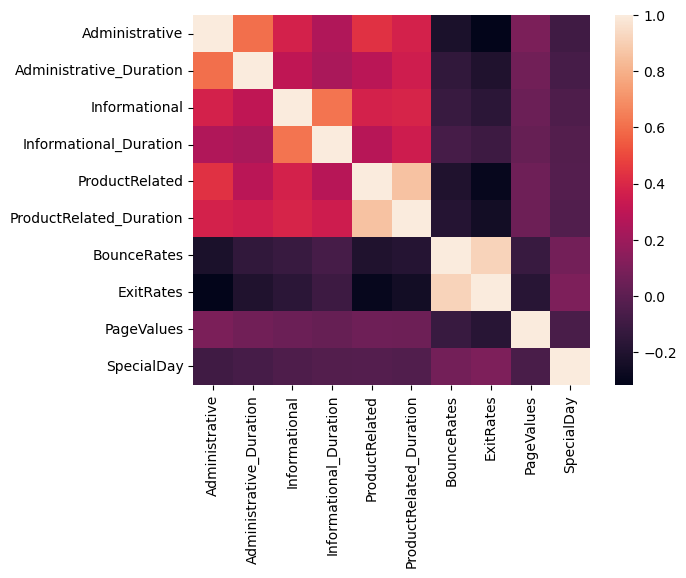

In [40]:
sns.heatmap(corr)

<h2>3. Let's explore the categorical data</h2>

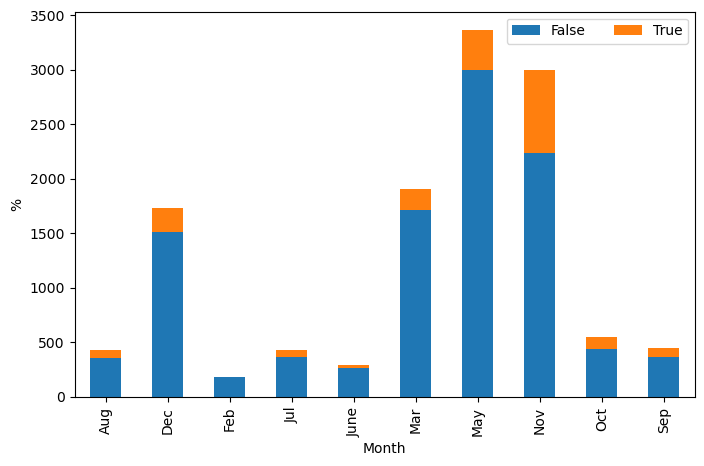

In [53]:
xtab = pd.crosstab(index=df['Month'],columns=df['Revenue'])

xtab.plot(kind='bar', stacked=True, figsize=(8, 5))

plt.xlabel("Month")
plt.ylabel("%")
plt.legend(loc="upper right", ncol=2)
plt.show()
